In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# uploding the data_file
df = pd.read_excel("Employee Sample Data - A.xlsx")

In [3]:
#check duplicates
print(df.duplicated().sum())
# There is no Duplicates

0


In [4]:
# Replace null values with values
#For FullName Column
df["Full Name"].fillna("unkown", inplace= True)

#For Job Title
Job = df["Job Title"].mode()[0]
df["Job Title"].fillna(Job, inplace= True)

#For Department 
Department = df["Department"].mode()[0]
df["Department"].fillna(Department, inplace= True)

#For Gendar
Gender = df["Gender"].mode()[0]
df["Gender"].fillna(Gender,inplace = True)

#For Ethnicity
for x in df.index:
    if pd.isna(df.loc[x, "Ethnicity"]) or df.loc[x, "Ethnicity"].strip() == "":
        if df.loc[x, "Country"] == "China":
            df.loc[x, "Ethnicity"] = "Asian"
        elif df.loc[x, "Country"] =="Brazil":
            df.loc[x, "Ethnicity"] = "Latino"
        else:
            df.loc[x, "Ethnicity"] = "Not Provided"
    
#For Age 
age = df["Age"].mean()
df["Age"].fillna(age, inplace = True)

#For Hiredate
df["Hire Date"].fillna("Not Provided", inplace = True)

#for Annual Salary
annual = df["Annual Salary"].median()
df["Annual Salary"].fillna(annual, inplace = True)

# For Bouns%
bonus = df["Bonus %"].mean()
df["Bonus %"].fillna(bonus, inplace = True)

# For Country
df["Country"].fillna("United States", inplace = True)

#For City
for x in df.index:
    if pd.isna(df.loc[x, "City"]) or df.loc[x, "City"].strip() == "":
        if df.loc[x, "Country"] == "United States" and df.loc[x, "Ethnicity"] == "Caucasian":
            city = df["City"].mode()[0]
            df["City"].fillna(city, inplace = True)
        
#For Exit Date
df["Exit Date"].fillna("Still working", inplace = True)
print("\nTable Info: ")
print(df.info())


Table Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EEID           1000 non-null   object 
 1   Full Name      1000 non-null   object 
 2   Job Title      1000 non-null   object 
 3   Department     1000 non-null   object 
 4   Business Unit  1000 non-null   object 
 5   Gender         1000 non-null   object 
 6   Ethnicity      1000 non-null   object 
 7   Age            1000 non-null   float64
 8   Hire Date      1000 non-null   object 
 9   Annual Salary  1000 non-null   float64
 10  Bonus %        1000 non-null   float64
 11  Country        1000 non-null   object 
 12  City           1000 non-null   object 
 13  Exit Date      1000 non-null   object 
dtypes: float64(3), object(11)
memory usage: 109.5+ KB
None


C:\Users\Estarta\AppData\Local\Temp\ipykernel_1084\3754825957.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Full Name"].fillna("unkown", inplace= True)
C:\Users\Estarta\AppData\Local\Temp\ipykernel_1084\3754825957.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [5]:
#Row with the largest salary
largest_salary = df.loc[df["Annual Salary"].idxmax()]
print("\nLargest_Salary: ")
print(largest_salary)


Largest_Salary: 
EEID                          E04354
Full Name               Raelynn Rios
Job Title             Vice President
Department                     Sales
Business Unit          Manufacturing
Gender                        Female
Ethnicity                     Latino
Age                             43.0
Hire Date        2016-08-21 00:00:00
Annual Salary               258498.0
Bonus %                         0.35
Country                United States
City                        Columbus
Exit Date              Still working
Name: 989, dtype: object


In [6]:
#Groupby Department to find Avg age and salary
print("\nAvrage age and Salary for Department: ")
avg_age_salary = df.groupby("Department")[["Age","Annual Salary"]].mean()
print(avg_age_salary)


Avrage age and Salary for Department: 
                       Age  Annual Salary
Department                               
Accounting       43.656250  123146.947917
Engineering      45.666894  109053.101266
Finance          45.203077  122986.350000
Human Resources  44.443548  117907.088710
IT               44.364081   97685.822314
Marketing        43.216667  129663.033333
Sales            43.609780  111120.635714


In [7]:
#Groupby Department and Ethnicity to find max_age, min_Age and median_salary
print("\nMaximum age,Minimum age and Median salary: ")
agg = df.groupby(["Department", "Ethnicity"])[["Age", "Annual Salary"]].agg(
    max_age =("Age", "max"),
    min_age =("Age", "min"),
    avg_salary =("Annual Salary", "median"))
print(agg)


Maximum age,Minimum age and Median salary: 
                                max_age    min_age  avg_salary
Department      Ethnicity                                     
Accounting      Asian         64.000000  25.000000    114893.0
                Black         51.000000  30.000000     91853.0
                Caucasian     62.000000  26.000000    121159.5
                Latino        62.000000  26.000000     92317.0
Engineering     Asian         65.000000  25.000000     91230.0
                Black         56.000000  27.000000     74412.0
                Caucasian     64.000000  25.000000     96057.0
                Latino        64.000000  27.000000     96639.0
Finance         Asian         64.000000  25.000000    124928.0
                Black         65.000000  25.000000    131652.0
                Caucasian     64.000000  25.000000    102847.0
                Latino        65.000000  25.000000    122829.0
Human Resources Asian         64.000000  25.000000    125871.5
          

In [8]:
# Save the cleaned data to a new Excel file
df.to_excel("Cleaned_Employee_Data.xlsx", index=False)

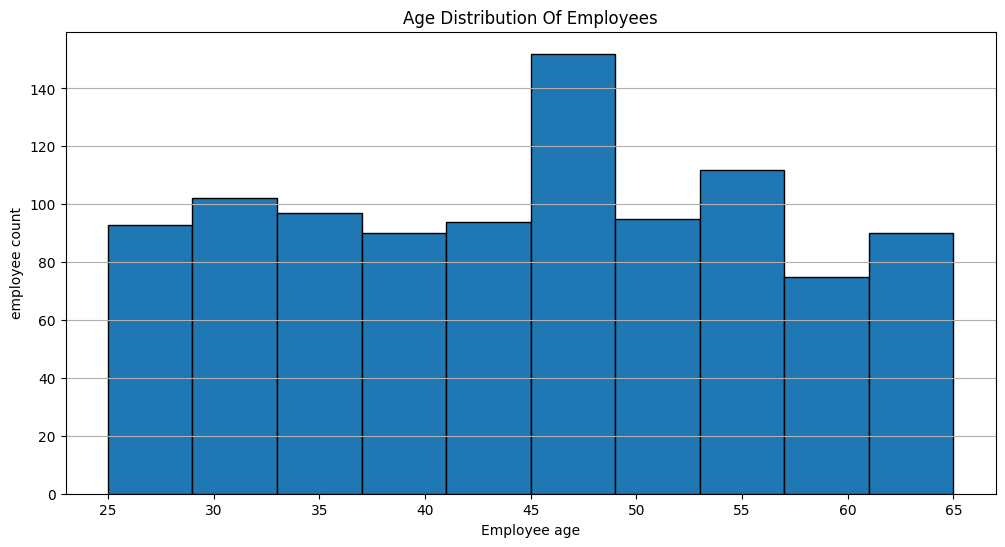

In [22]:
# Age Distribution using Histogram
x = np.array(df["Age"])
plt.figure(figsize=(12,6))
plt.xlabel("Employee age")
plt.ylabel("employee count")
plt.title("Age Distribution Of Employees")
plt.grid(axis="y")
plt.hist(x, edgecolor = "black")
plt.show()

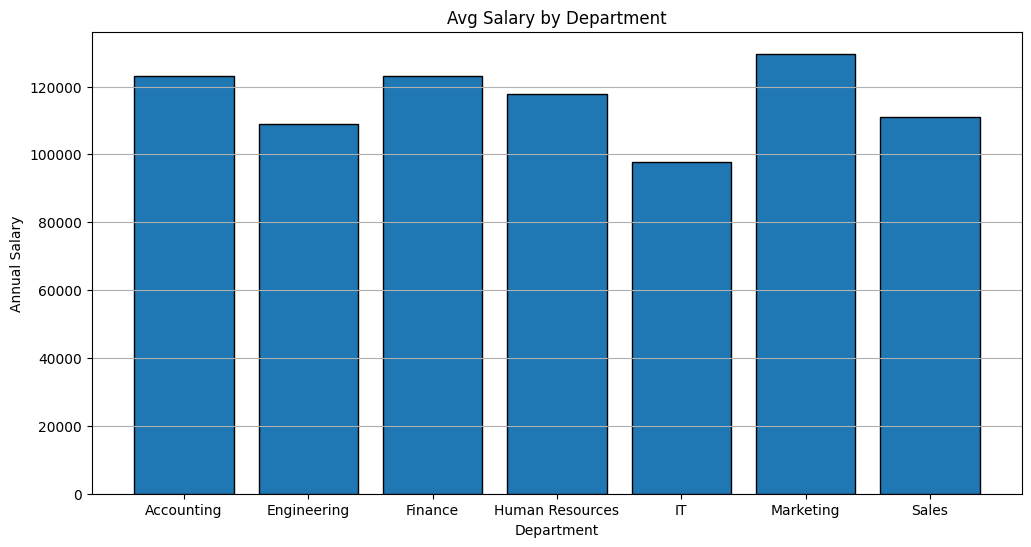

In [36]:
# Salary based on Department using bar chart

avg_salary = df.groupby("Department")["Annual Salary"].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_salary.index, avg_salary.values, edgecolor = "black")
plt.grid(axis="y")
plt.title("Avg Salary by Department")
plt.xlabel("Department")
plt.ylabel("Annual Salary")
plt.show()

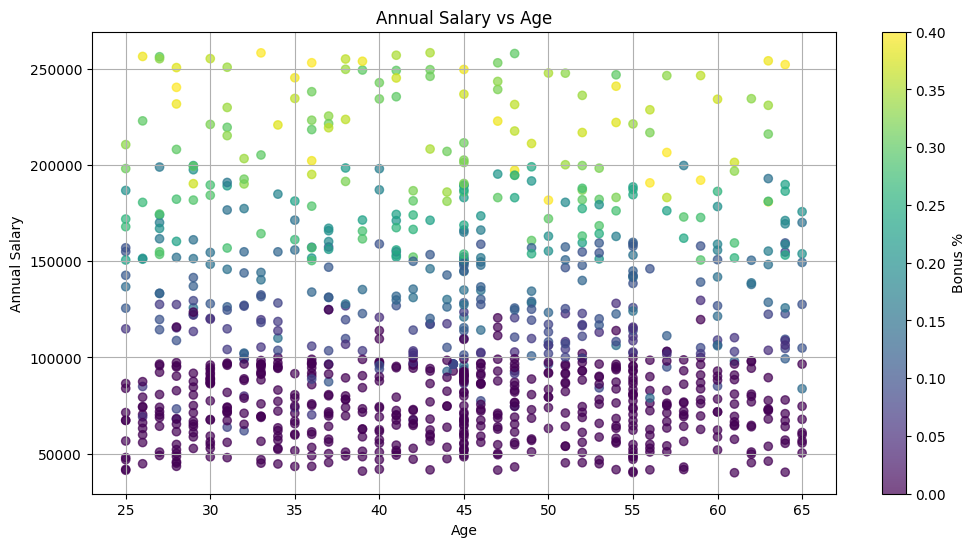

In [11]:
# Relationship between Salary and age using scatter

plt.figure(figsize=(12,6))
plt.scatter(df["Age"], df["Annual Salary"] , c=df['Bonus %'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Bonus %')
plt.title("Annual Salary vs Age")
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.grid()
plt.show()

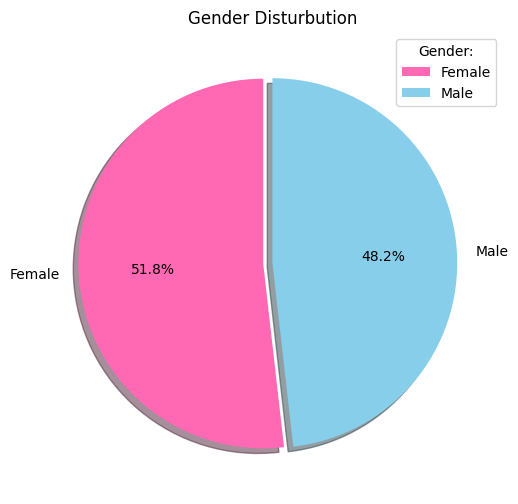

In [23]:
#Gendar Distribution

gender = df["Gender"].value_counts()
plt.figure(figsize=(12, 6))
my_color = ["Hotpink", "skyblue"]
my_explode = [0.05, 0]
plt.pie(gender, labels = gender.index, colors= my_color, startangle= 90, shadow = True, explode=my_explode, autopct='%1.1f%%')
plt.title("Gender Disturbution")
plt.legend(title = "Gender:")
plt.show()

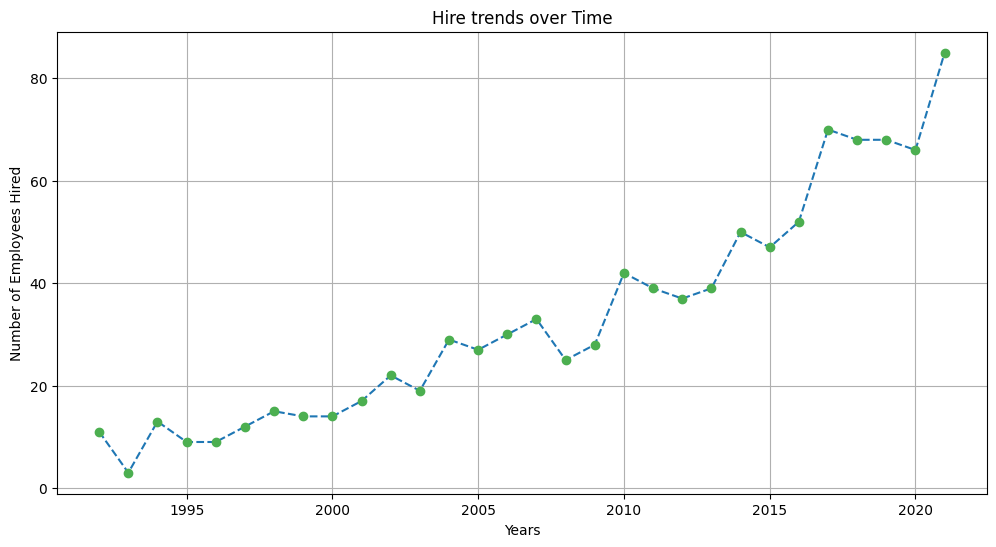

In [31]:
#Hire Trends over Time

df_filtered = df[df["Hire Date"] != "Not Provided"]
df["Hire Date"] = pd.to_datetime(df_filtered["Hire Date"])
plt.figure(figsize=(12,6))
hire_date = df["Hire Date"].dt.year.value_counts().sort_index()
plt.grid()
plt.xlabel("Years")
plt.ylabel("Number of Employees Hired")
plt.title("Hire trends over Time")
plt.plot(hire_date.index, hire_date.values, marker = "o", mec = '#4CAF50', mfc = '#4CAF50', linestyle = "--")
plt.show()